In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
import seaborn
seaborn.set(style="whitegrid")
rcParams['figure.figsize'] = (16, 5)

In [3]:
from IPython.display import Audio

In [4]:
import numpy as np
import librosa
import librosa.display
import pysptk
from scipy.io import wavfile

In [77]:
sr, x = wavfile.read('/home/patrick/pholonow__a.wav')
assert sr == 16000
x = x.astype(np.float64)
print(x.shape)

(31293,)


## Source parameter extraction
**Framing and windowing**


In [78]:
frame_length = 1024
hop_length = 80

# Note that almost all of pysptk functions assume input array is C-contiguous and np.float64 element type
frames = librosa.util.frame(x, frame_length=frame_length, hop_length=hop_length).astype(np.float64).T

# Windowing
frames *= pysptk.blackman(frame_length)

assert frames.shape[1] == frame_length 

F0 estimation¶


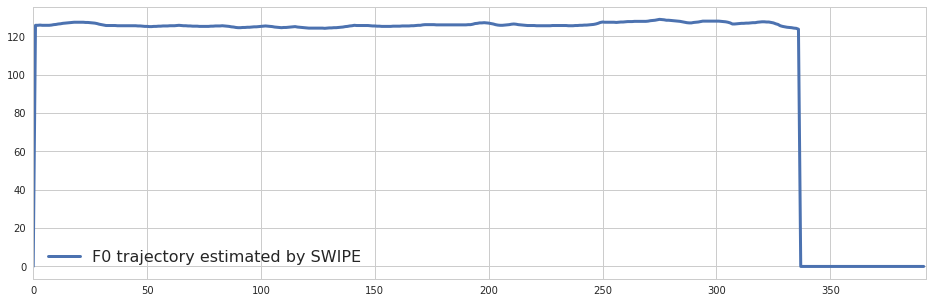

In [79]:
# F0 estimation
f0 = pysptk.swipe(x.astype(np.float64), fs=sr, hopsize=hop_length, min=60, max=240, otype="f0")
plot(f0, linewidth=3, label="F0 trajectory estimated by SWIPE")
xlim(0, len(f0))
legend(prop={'size': 16});


**Source excitation generation**


In [82]:
# Note that pysptk.excite assuems input as pitch, not *f0*.
pitch = pysptk.swipe(x.astype(np.float64), fs=sr, hopsize=hop_length, min=60, max=240, otype="pitch")
source_excitation = pysptk.excite(pitch, hop_length)

<Container object of 3 artists>

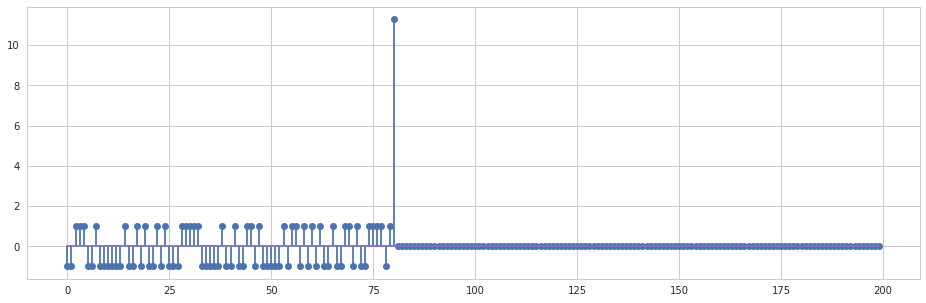

In [85]:
stem(source_excitation[0:200])

In [86]:
from pysptk.synthesis import MLSADF, Synthesizer
from pysptk.synthesis import AllPoleDF
order=13

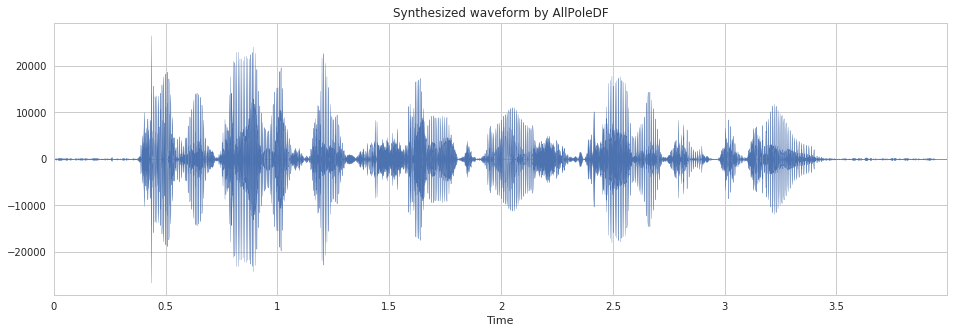

In [26]:


lpc = pysptk.lpc(frames, order)

# make sure lpc has loggain
lpc[:, 0] = np.log(lpc[:, 0])

synthesizer = Synthesizer(AllPoleDF(order=order), hop_length)

x_synthesized = synthesizer.synthesis(source_excitation, lpc)

librosa.display.waveplot(x_synthesized, sr=sr)
title("Synthesized waveform by AllPoleDF")
Audio(x_synthesized, rate=sr)

In [69]:
lpc.shape

(788, 61)

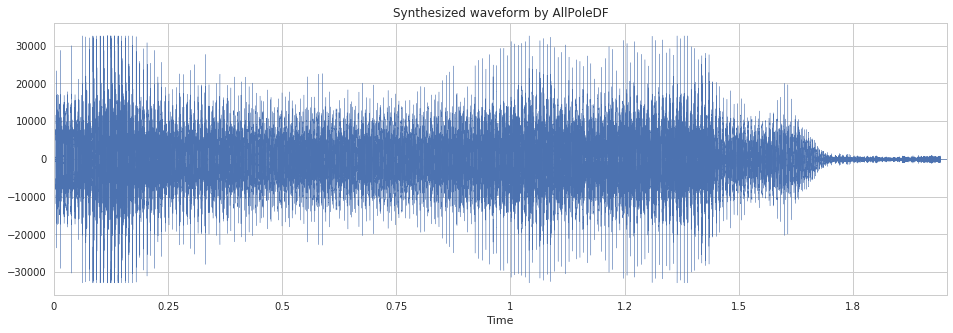

In [87]:

librosa.display.waveplot(x, sr=sr)
title("Synthesized waveform by AllPoleDF")
Audio(x, rate=sr)